# Data Exploration

In this notebook, we will look at the chant data and explore its statistics. The original corpus is the Cantus Corpus and it can be found here: https://github.com/bacor/cantuscorpus. The corpus contains almost 0.5 million datapoints. We filtered out those which don't have either melody (in the 'volpiano' column) or full text ('full_text'), and additionaly those whose melody and text can't be properly aligned. The resulting dataset contains some 13,000 datapoints.

In [1]:
# imports
import pandas as pd
import matplotlib
%matplotlib inline

In [2]:
# create dataframe from the csv file
path = '../../cantuscorpus-v0.2/csv/aligned.csv'
df = pd.read_csv(path, usecols=range(1,23))     # usecols is used to remove an index column which contains indices of the original dataset

In [3]:
# some basic data
print(df.shape)
print(df.columns)
print(df.head())

(13397, 22)
Index(['id', 'incipit', 'cantus_id', 'mode', 'finalis', 'differentia',
       'siglum', 'position', 'folio', 'sequence', 'marginalia',
       'cao_concordances', 'feast_id', 'genre_id', 'office_id', 'source_id',
       'melody_id', 'drupal_path', 'full_text', 'full_text_manuscript',
       'volpiano', 'notes'],
      dtype='object')
             id                     incipit cantus_id mode finalis  \
0  chant_000622  A Christo de caelo vocatus    001188    8     NaN   
1  chant_000636  A Christo de caelo vocatus   007123a    1     NaN   
2  chant_000646  A Christo de caelo vocatus   007123a    1     NaN   
3  chant_000668  A Christo de caelo vocatus   007123a    1     NaN   
4  chant_000924           A deo praelectus*    600006    8     NaN   

  differentia           siglum position folio  sequence  ...    feast_id  \
0           1  F-Pn lat. 12044       3.  053v       5.0  ...  feast_0287   
1         NaN   US-CHNbcbl 097       01  035r       2.0  ...  feast_1321   
2   

Let's look at the different genres in the table.

In [4]:
df.genre_id.value_counts()

genre_a       4888
genre_r       2016
genre_v       1779
genre_w       1129
genre_h        862
genre_i        365
genre_in       306
genre_cm       294
genre_gr       268
genre_av       245
genre_grv      220
genre_tcv      185
genre_hv       172
genre_of       138
genre_ofv       97
genre_d         75
genre_inv       62
genre_tc        57
genre_va        27
genre_ip        21
genre_alv       16
genre_vahw      12
genre_bd        10
genre_sq         8
genre_cr         7
genre_gl         6
genre_sa         5
genre_ps         5
genre_l          4
genre_al         3
genre_tp         2
genre_li         2
genre_pn         2
genre_ite        1
genre_ky         1
genre_m          1
genre_ca         1
Name: genre_id, dtype: int64

Genre names can be obtained from a different csv file.

In [5]:
path = '../../cantuscorpus-v0.2/csv/genre.csv'
genres_df = pd.read_csv(path)
genres_df

,id,name,description,mass_or_office
0,genre_?,[?],"Unknown, ambiguous, unidentifiable, illegible","['Mass', 'Office']"
1,genre_a,A,Antiphon,['Office']
2,genre_ag,Ag,Agnus dei,['Mass']
3,genre_al,Al,Alleluia,['Mass']
4,genre_alv,AlV,Alleluia verse,['Mass']
5,genre_av,AV,Antiphon verse,['Office']
6,genre_bd,BD,Benedicamus domino,"['Mass', 'Office']"
7,genre_ca,Ca,Canticle,"['Mass', 'Office']"
8,genre_cap,Cap,Capitulum,['Office']
9,genre_cav,CaV,Canticle verse,"['Mass', 'Office']"


From this point on, we are interested only in the genres that have at least 100 examples in our dataset.

Let's look at the histogram of genres.

In [6]:
genre_list = df.genre_id.value_counts().index[df.genre_id.value_counts() >= 100].values

<AxesSubplot:>

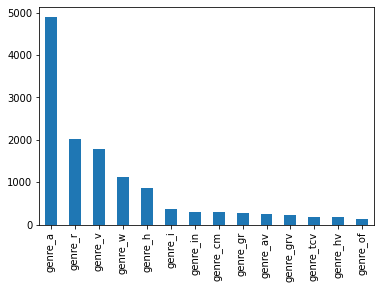

In [7]:
df['genre_id'].value_counts()[genre_list].plot(kind='bar')

Now, find the distribution of number of words.

array([[<AxesSubplot:title={'center':'word_count'}>]], dtype=object)

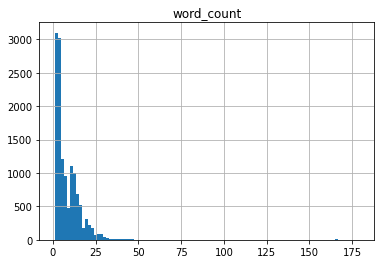

In [8]:
df.assign(word_count=lambda x: x.full_text.str.split().apply(len)).hist('word_count', bins=100)

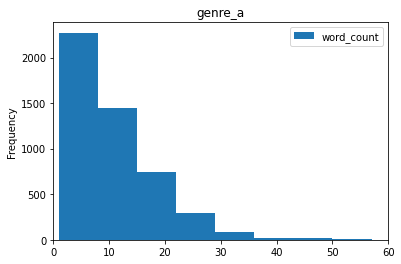

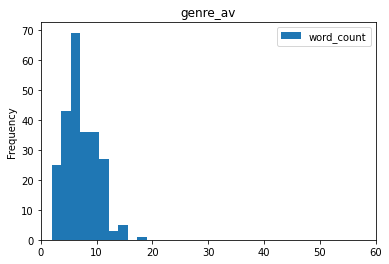

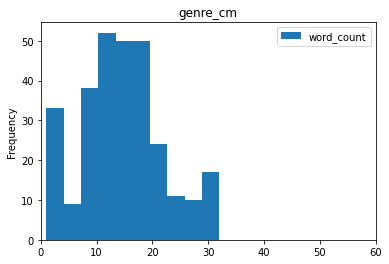

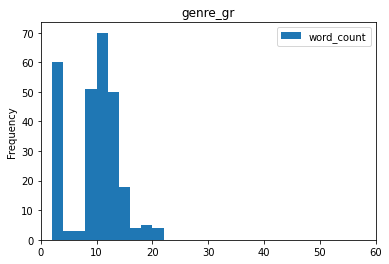

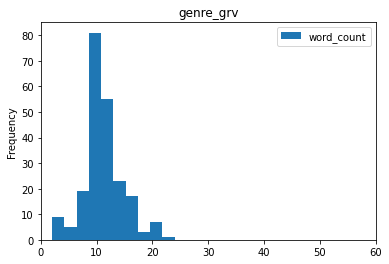

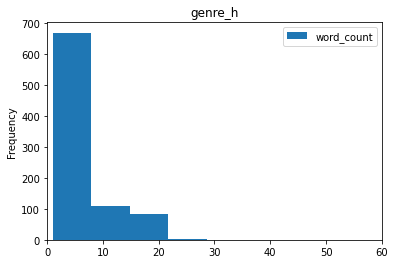

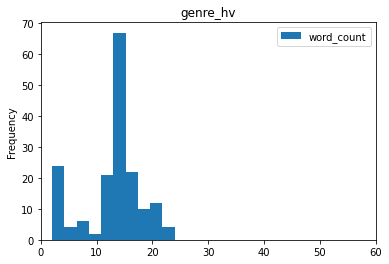

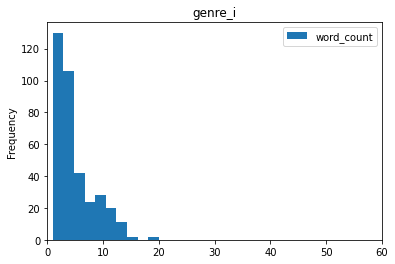

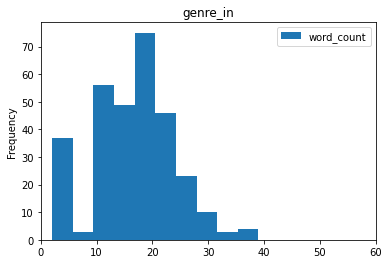

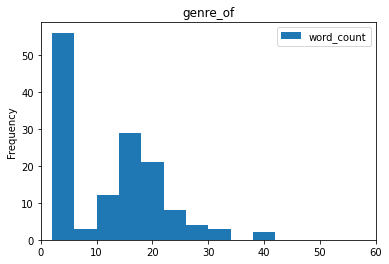

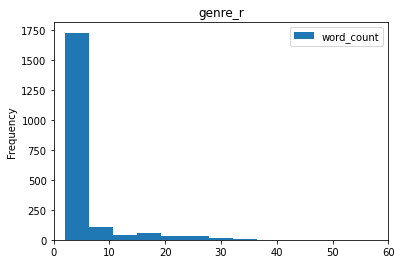

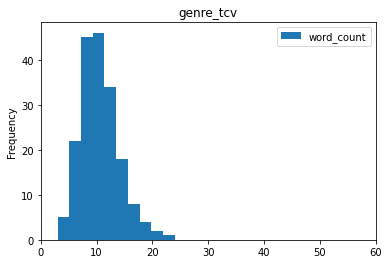

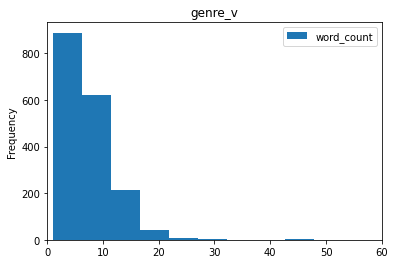

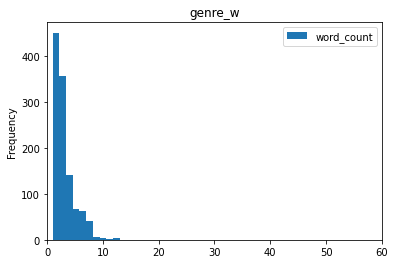

In [9]:
groups = df[df['genre_id'].isin(genre_list)].assign(word_count=lambda x: x.full_text.str.split().apply(len)).groupby('genre_id')
axes = groups.plot(kind='hist', y='word_count', xlim=(0, 60))
for i, (group, values) in enumerate(groups):
    axes[i].set_title(group)

We can do the same for melody (i.e. 'volpiano') length.

array([[<AxesSubplot:title={'center':'mel_len'}>]], dtype=object)

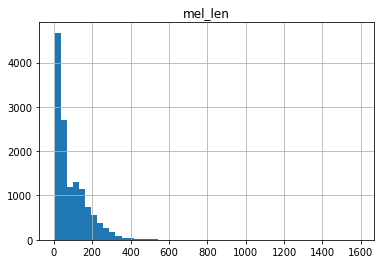

In [10]:
df.assign(mel_len=lambda x: x.volpiano.str.len()).hist('mel_len', bins=50)

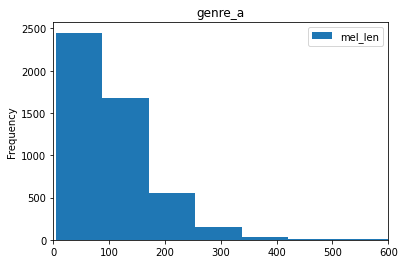

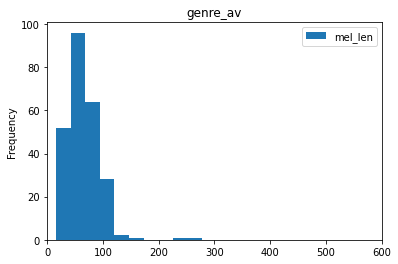

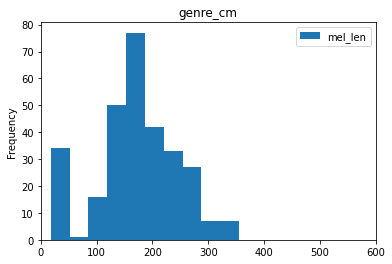

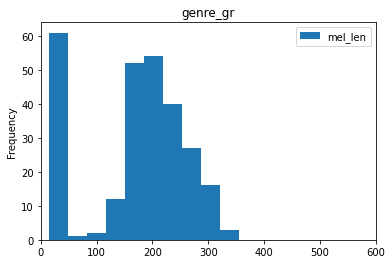

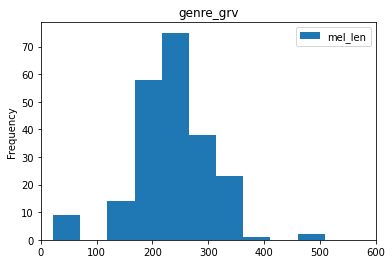

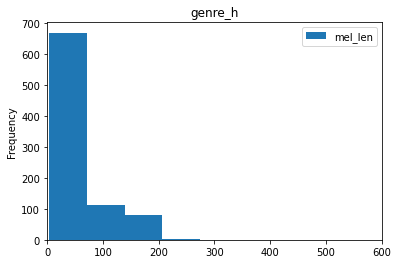

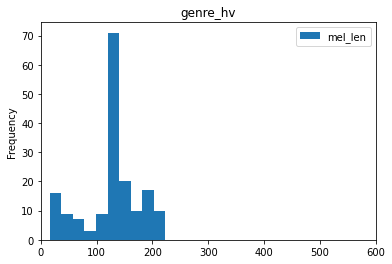

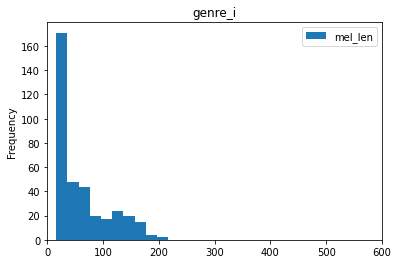

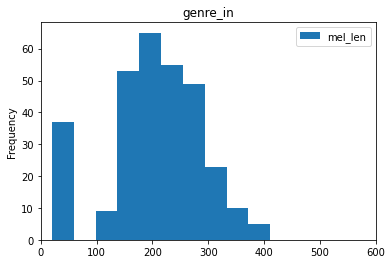

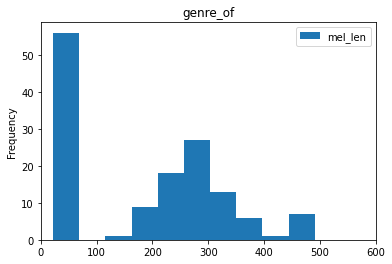

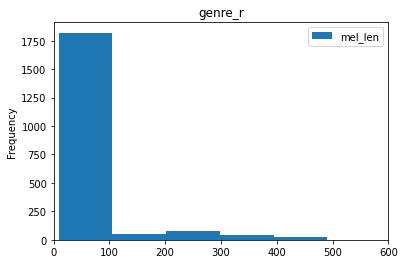

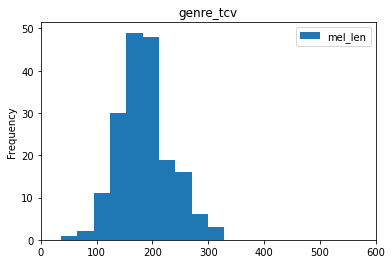

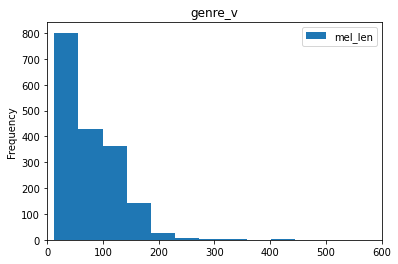

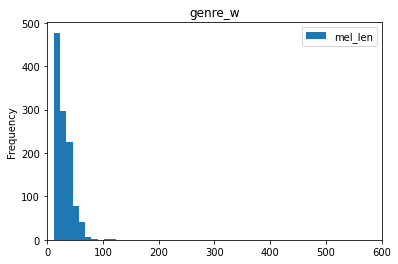

In [11]:
groups = df[df['genre_id'].isin(genre_list)].assign(mel_len=lambda x: x.volpiano.str.len()).groupby('genre_id')
axes = groups.plot(kind='hist', y='mel_len', xlim=(0, 600))
for i, (group, values) in enumerate(groups):
    axes[i].set_title(group)

We can check the number of neumes by removing dashes from volpiano, which is equivalent to splitting it by '-'.

array([[<AxesSubplot:title={'center':'mel_len'}>]], dtype=object)

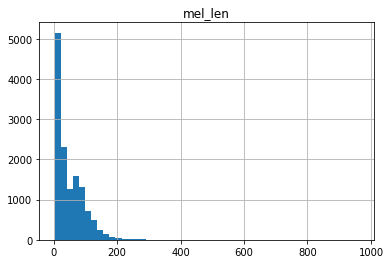

In [12]:
df.assign(mel_len=lambda x: x.volpiano.str.split('-').apply(len) - 1).hist('mel_len', bins=50)

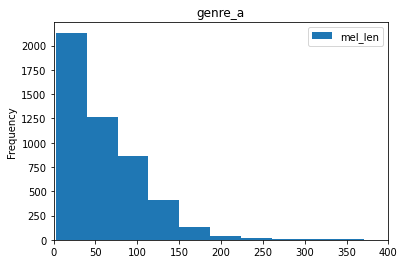

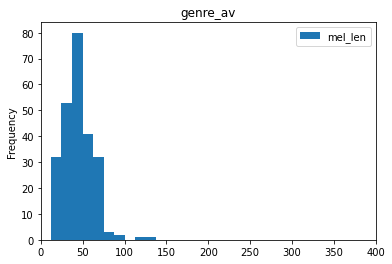

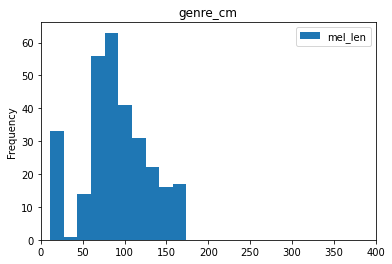

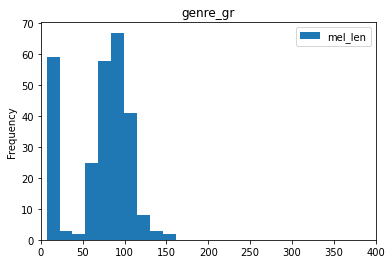

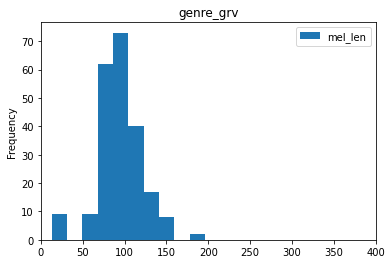

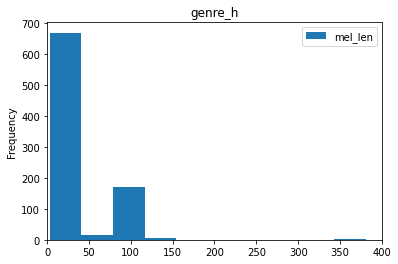

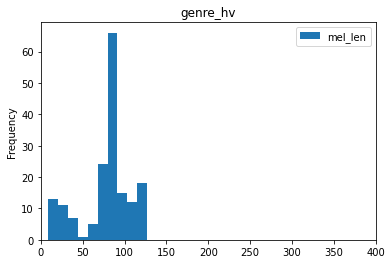

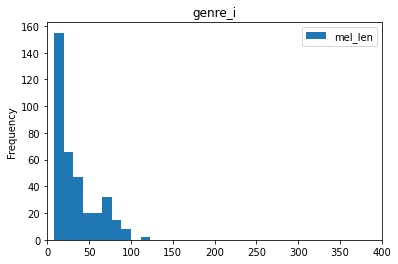

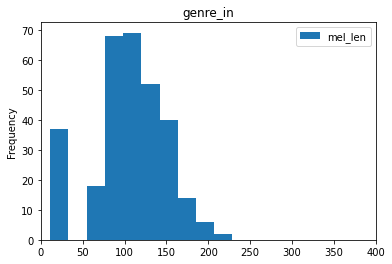

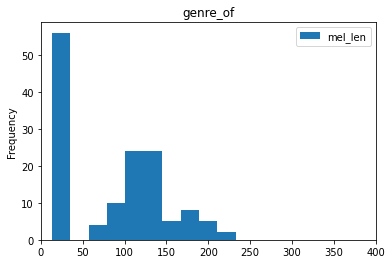

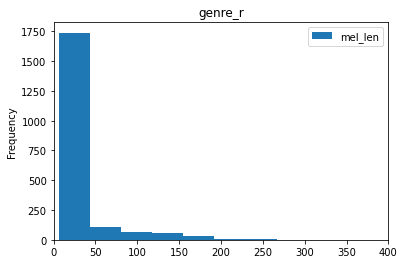

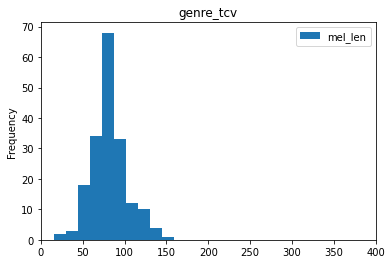

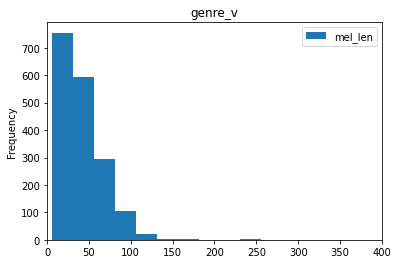

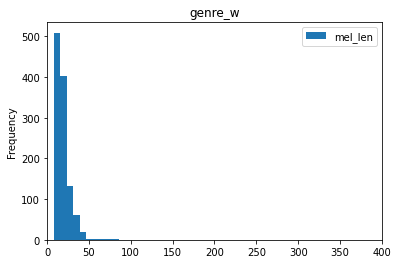

In [13]:
groups = df[df['genre_id'].isin(genre_list)].assign(mel_len=lambda x: x.volpiano.str.split('-').apply(len) - 1).groupby('genre_id')
axes = groups.plot(kind='hist', y='mel_len', xlim=(0, 400))
for i, (group, values) in enumerate(groups):
    axes[i].set_title(group)

Syllables are separated by --.

array([[<AxesSubplot:title={'center':'mel_len'}>]], dtype=object)

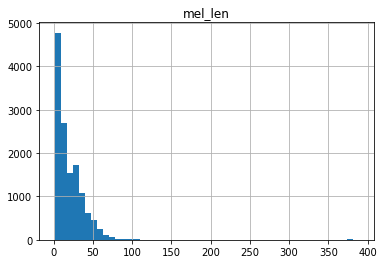

In [14]:
df.assign(mel_len=lambda x: x.volpiano.str.split('--').apply(len) - 1).hist('mel_len', bins=50)

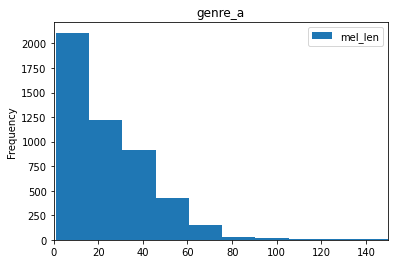

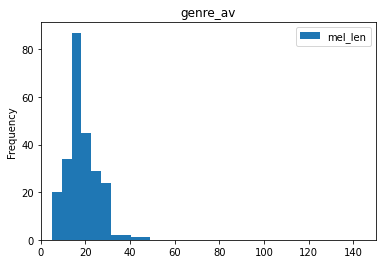

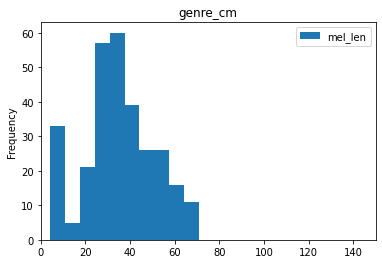

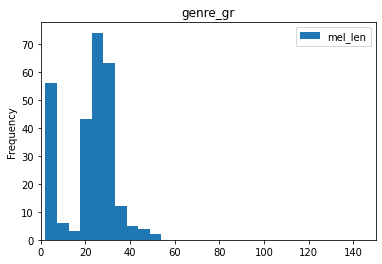

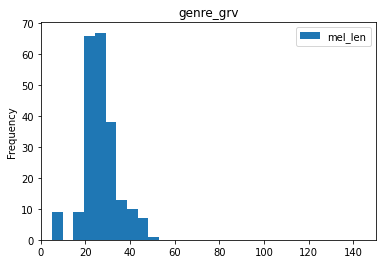

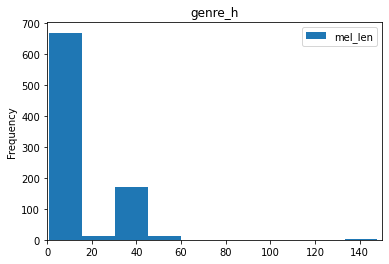

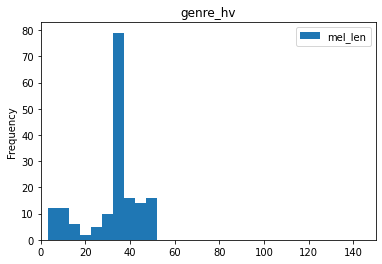

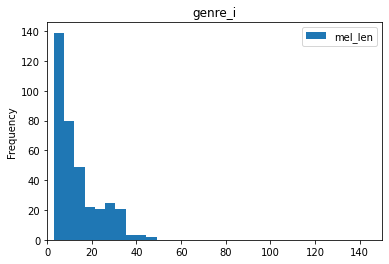

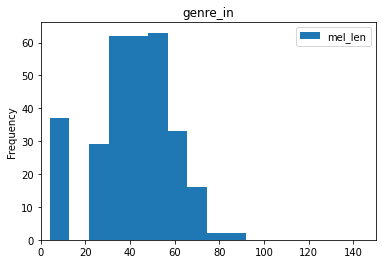

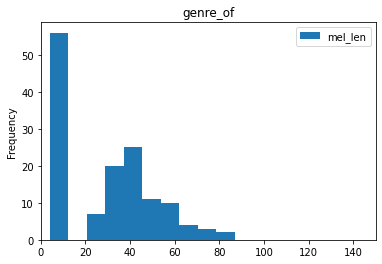

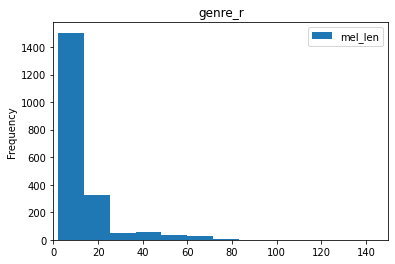

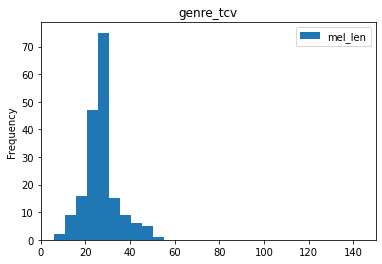

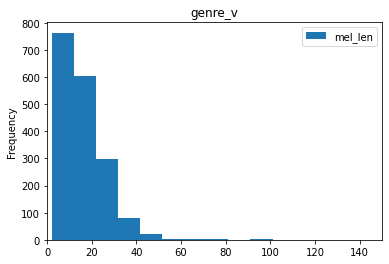

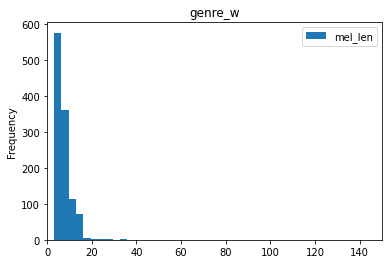

In [15]:
groups = df[df['genre_id'].isin(genre_list)].assign(mel_len=lambda x: x.volpiano.str.split('--').apply(len) - 1).groupby('genre_id')
axes = groups.plot(kind='hist', y='mel_len', xlim=(0, 150))
for i, (group, values) in enumerate(groups):
    axes[i].set_title(group)

Words are separated by ---

array([[<AxesSubplot:title={'center':'mel_len'}>]], dtype=object)

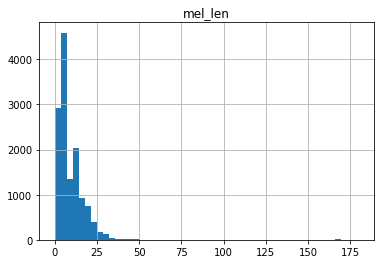

In [16]:
df.assign(mel_len=lambda x: x.volpiano.str.split('---').apply(len) - 1).hist('mel_len', bins=50)

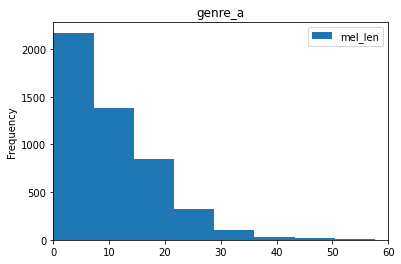

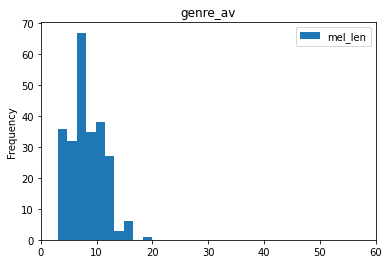

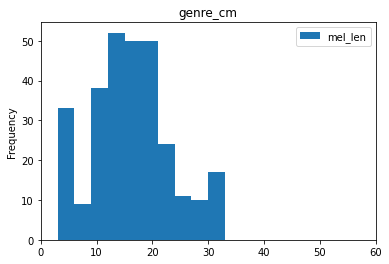

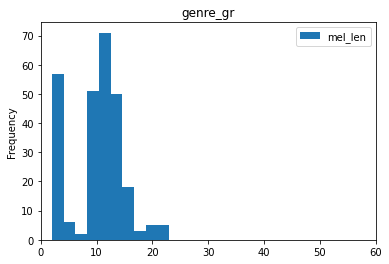

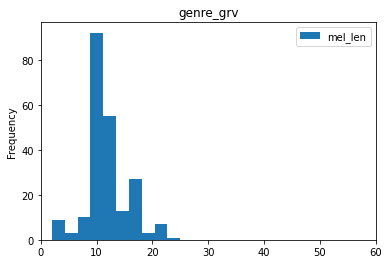

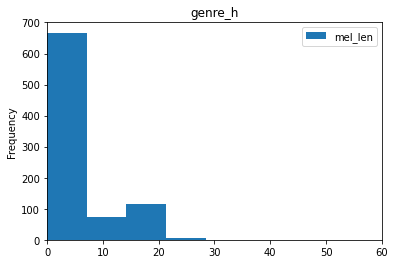

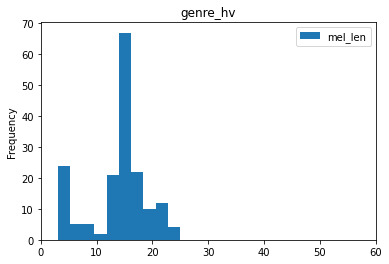

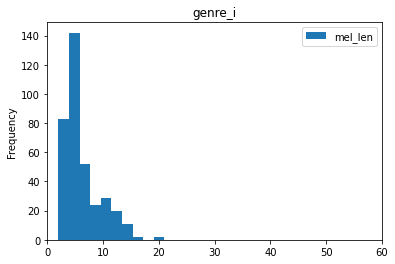

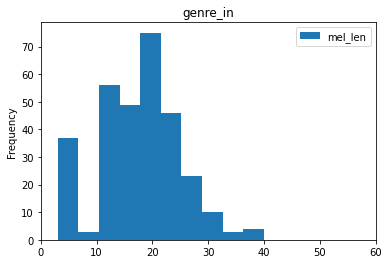

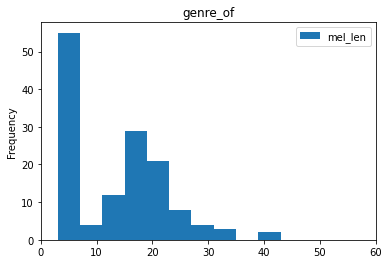

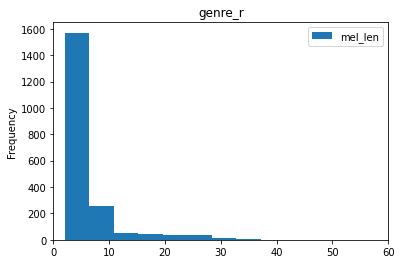

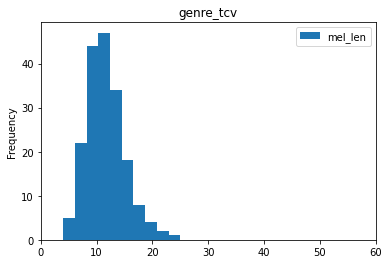

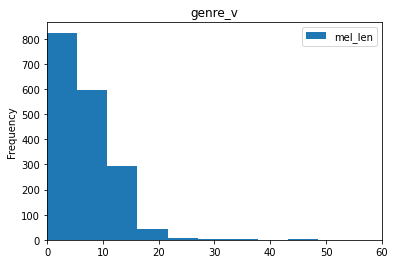

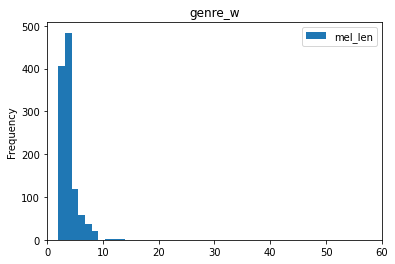

In [17]:
groups = df[df['genre_id'].isin(genre_list)].assign(mel_len=lambda x: x.volpiano.str.split('---').apply(len) - 1).groupby('genre_id')
axes = groups.plot(kind='hist', y='mel_len', xlim=(0, 60))
for i, (group, values) in enumerate(groups):
    axes[i].set_title(group)

Compare the ratio of words in the text to words in the volpiano.

array([[<AxesSubplot:title={'center':'ratio'}>]], dtype=object)

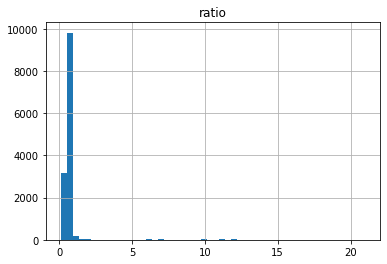

In [18]:
df.assign(ratio=lambda x: (x.full_text.str.split().apply(len)) / (x.volpiano.str.split('---').apply(len))).hist('ratio', bins=50)

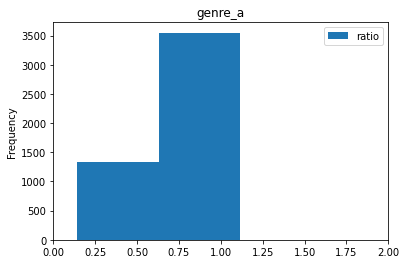

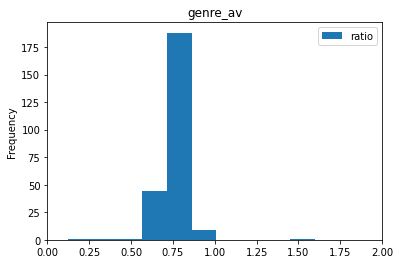

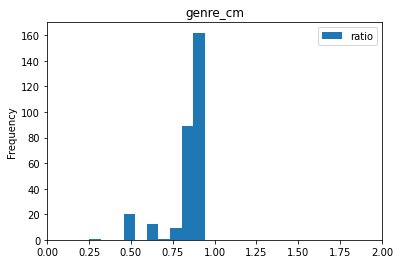

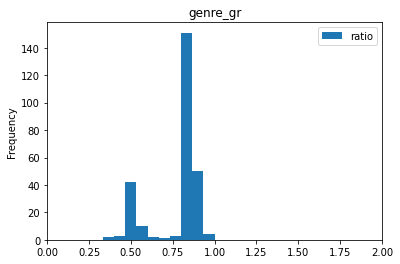

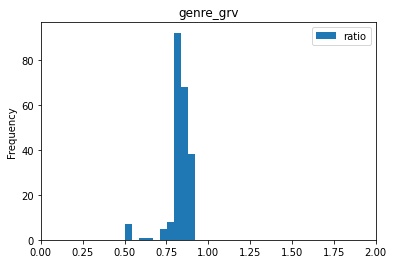

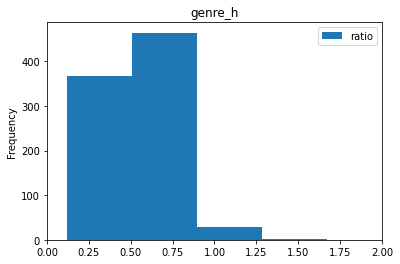

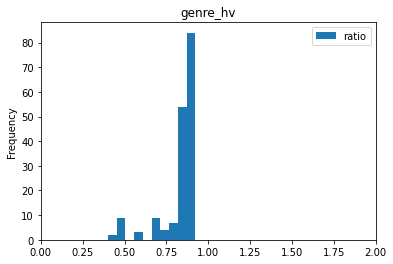

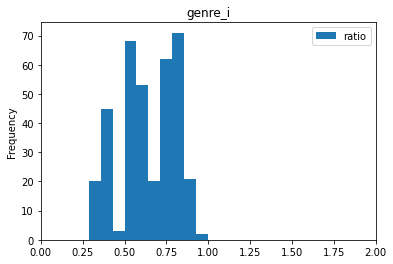

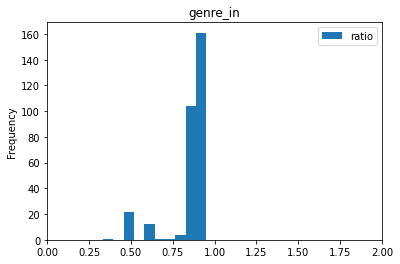

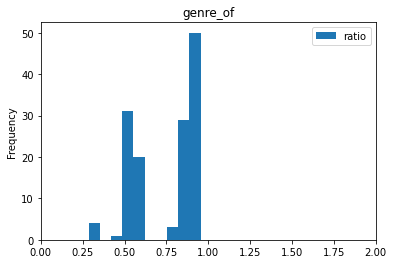

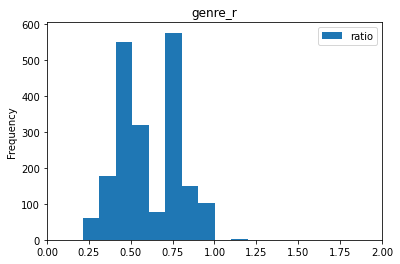

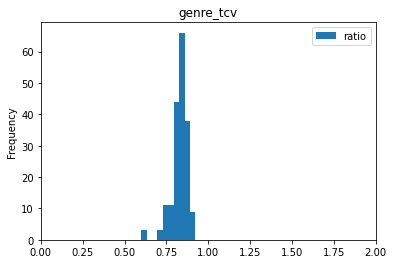

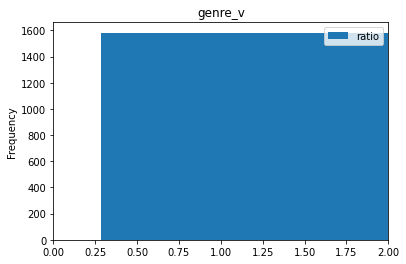

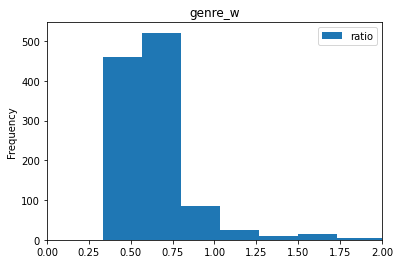

In [19]:
groups = df[df['genre_id'].isin(genre_list)].assign(ratio=lambda x: (x.full_text.str.split().apply(len)) / (x.volpiano.str.split('---').apply(len))).groupby('genre_id')
axes = groups.plot(kind='hist', y='ratio', xlim=(0, 2), bins=10)
for i, (group, values) in enumerate(groups):
    axes[i].set_title(group)